In [17]:
#Importing libraries esp requests
import requests
import pandas as pd 
import matplotlib.pyplot as plt

#Listing all urls to call here
dayone = "https://api.covid19api.com/dayone/country/singapore"
todayglobalsummary = "https://api.covid19api.com/summary" 
sgdailycases = "https://api.covid19api.com/dayone/country/singapore/status/recovered" 
sgrunningtotal = "https://api.covid19api.com/total/dayone/country/singapore/status/recovered"


In [18]:
response = requests.request("GET", dayone)

singapore = pd.DataFrame(response.json())

#Returns Cumulative Total for Singapore for all confirmed/active/deaths/recovered cases each day beginning 01 Jan 2020 
singapore

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,,,,1.35,103.82,1,0,0,1,2020-01-23T00:00:00Z
1,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-24T00:00:00Z
2,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-25T00:00:00Z
3,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,,,,1.35,103.82,4,0,0,4,2020-01-26T00:00:00Z
4,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,SG,,,,1.35,103.82,5,0,0,5,2020-01-27T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,SG,,,,1.35,103.82,267916,744,0,267172,2021-12-03T00:00:00Z
681,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,SG,,,,1.35,103.82,268659,746,0,267913,2021-12-04T00:00:00Z
682,3edd9b12-f2e3-413e-8625-a9661bf66388,Singapore,SG,,,,1.35,103.82,269211,759,0,268452,2021-12-05T00:00:00Z
683,9fb7b3f3-3e05-4a46-8e2b-9357f44159ed,Singapore,SG,,,,1.35,103.82,269873,763,0,269110,2021-12-06T00:00:00Z


In [19]:
for i in range(1, len(singapore)):
    singapore.loc[i, 'Daily_Confirmed'] = singapore.loc[i, 'Confirmed'] - singapore.loc[i-1, 'Confirmed']
    singapore.loc[i, 'Daily_Deaths'] = singapore.loc[i, 'Deaths'] - singapore.loc[i-1, 'Deaths']
    singapore.loc[i, 'Daily_Recovered'] = singapore.loc[i, 'Recovered'] - singapore.loc[i-1, 'Recovered']
    singapore.loc[i, 'Daily_Active'] = singapore.loc[i, 'Active'] - singapore.loc[i-1, 'Active']

singapore

,ID,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Daily_Active
0,f1471591-909d-4c12-9e8b-26ce43fa3b4e,Singapore,SG,,,,1.35,103.82,1,0,0,1,2020-01-23T00:00:00Z,NaN,NaN,NaN,NaN
1,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-24T00:00:00Z,2.0,0.0,0.0,2.0
2,25bb999d-2443-4505-925d-27f21af143f6,Singapore,SG,,,,1.35,103.82,3,0,0,3,2020-01-25T00:00:00Z,0.0,0.0,0.0,0.0
3,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,SG,,,,1.35,103.82,4,0,0,4,2020-01-26T00:00:00Z,1.0,0.0,0.0,1.0
4,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,SG,,,,1.35,103.82,5,0,0,5,2020-01-27T00:00:00Z,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,SG,,,,1.35,103.82,267916,744,0,267172,2021-12-03T00:00:00Z,766.0,9.0,0.0,757.0
681,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,SG,,,,1.35,103.82,268659,746,0,267913,2021-12-04T00:00:00Z,743.0,2.0,0.0,741.0
682,3edd9b12-f2e3-413e-8625-a9661bf66388,Singapore,SG,,,,1.35,103.82,269211,759,0,268452,2021-12-05T00:00:00Z,552.0,13.0,0.0,539.0
683,9fb7b3f3-3e05-4a46-8e2b-9357f44159ed,Singapore,SG,,,,1.35,103.82,269873,763,0,269110,2021-12-06T00:00:00Z,662.0,4.0,0.0,658.0


In [20]:
singapore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               685 non-null    object 
 1   Country          685 non-null    object 
 2   CountryCode      685 non-null    object 
 3   Province         685 non-null    object 
 4   City             685 non-null    object 
 5   CityCode         685 non-null    object 
 6   Lat              685 non-null    object 
 7   Lon              685 non-null    object 
 8   Confirmed        685 non-null    int64  
 9   Deaths           685 non-null    int64  
 10  Recovered        685 non-null    int64  
 11  Active           685 non-null    int64  
 12  Date             685 non-null    object 
 13  Daily_Confirmed  684 non-null    float64
 14  Daily_Deaths     684 non-null    float64
 15  Daily_Recovered  684 non-null    float64
 16  Daily_Active     684 non-null    float64
dtypes: float64(4), i

In [21]:
singapore.dtypes

ID                  object
Country             object
CountryCode         object
Province            object
City                object
CityCode            object
Lat                 object
Lon                 object
Confirmed            int64
Deaths               int64
Recovered            int64
Active               int64
Date                object
Daily_Confirmed    float64
Daily_Deaths       float64
Daily_Recovered    float64
Daily_Active       float64
dtype: object

In [22]:
singapore['Date'] = pd.to_datetime(singapore['Date'], infer_datetime_format=True)
singapore = singapore.set_index('Date') 
singapore = singapore.drop(['Province','City','CityCode','CountryCode','Lat','Lon'],axis = 1)
singapore.dropna(inplace=True)
singapore

,ID,Country,Confirmed,Deaths,Recovered,Active,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Daily_Active
Date,,,,,,,,,,
2020-01-24,ad7bf6e4-27b0-46e9-bdc5-998458be7e6c,Singapore,3,0,0,3,2.0,0.0,0.0,2.0
2020-01-25,25bb999d-2443-4505-925d-27f21af143f6,Singapore,3,0,0,3,0.0,0.0,0.0,0.0
2020-01-26,297dd8d4-5417-4922-9ac9-a93b9902d4c8,Singapore,4,0,0,4,1.0,0.0,0.0,1.0
2020-01-27,bee2a95e-2cf6-46e5-b2a5-9f4b4cca9613,Singapore,5,0,0,5,1.0,0.0,0.0,1.0
2020-01-28,64b738cc-1d17-41c1-a9aa-d60900d57140,Singapore,7,0,0,7,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-03,691eaac8-5a1c-46f0-b532-199607de0e93,Singapore,267916,744,0,267172,766.0,9.0,0.0,757.0
2021-12-04,a6c9290f-66cb-4395-972a-54d27c5acf05,Singapore,268659,746,0,267913,743.0,2.0,0.0,741.0
2021-12-05,3edd9b12-f2e3-413e-8625-a9661bf66388,Singapore,269211,759,0,268452,552.0,13.0,0.0,539.0


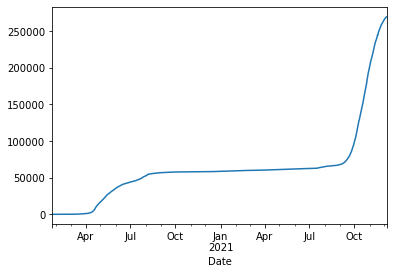

In [23]:
singapore['Confirmed'].plot()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB65B2D710>,
      dtype=object)

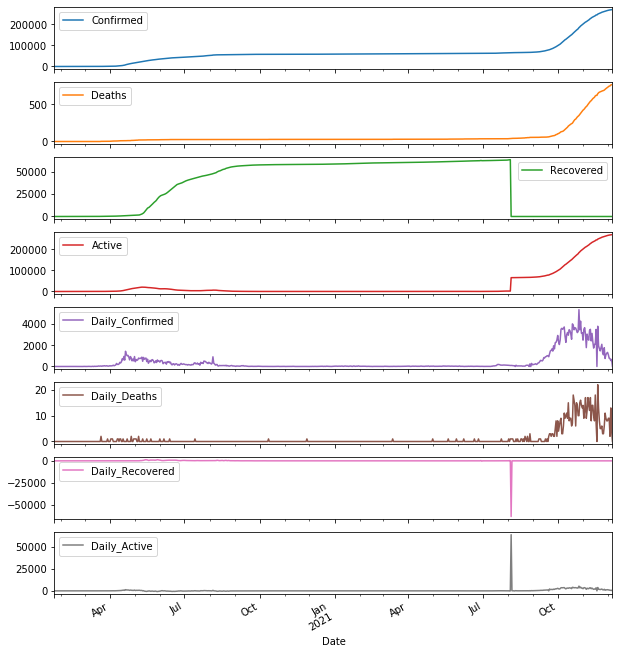

In [24]:
singapore.plot(subplots=True, figsize=(10,12))

<h3>There could be something wrong with the data above</h3>

- It seems that at 2021-08-04 the **API Counter resetted** and **total recovered cases suddenly dropped to 0** and total active cases suddenly increased from 2014 to 65468 cases on 2021-08-05 hmmm
- Lets attempt to verify this further before proceeding
- This returns the days where something went wrong with the API, as you can see, the daily recovered cases are negative, which means somehow the cumulative recovered cases all dropped to 0 on the 2021-08-05 




In [25]:
## This returns the days where something went wrong with the API, as you can see, the daily recovered cases are negative, which means somehow the cumulative recovered cases all dropped to 0 on the 2021-08-05 
singapore[singapore.Daily_Recovered< 0]


,ID,Country,Confirmed,Deaths,Recovered,Active,Daily_Confirmed,Daily_Deaths,Daily_Recovered,Daily_Active
Date,,,,,,,,,,
2021-06-30,815a14db-566e-4c1f-a0ee-94310472b688,Singapore,62579,36,62228,315,16.0,0.0,-335.0,7.0
2021-08-05,c0d0131e-4312-484f-8f83-42fba788ad84,Singapore,65508,40,0,65468,98.0,1.0,-63357.0,63454.0


- This returns one day before the previous 2021-08-05 for 2021-08-04 where you can see there were 63357 covid cases cumulative who have recovered but the next day this counter has resetted to 0. 
- How strange! Perhaps the count was resetted to zero due to some API error?
- Lets verify this with the other API endpoints as well. 

In [26]:
## This returns one day before the previous 2021-08-05 for 2021-08-04 where you can see there were 63357 covid cases cumulative who have recovered but the next day this counter has resetted to 0. 
singapore.loc['20210804'] 


ID                 170da623-3a7a-4225-9fe3-fa83c8b81694
Country                                       Singapore
Confirmed                                         65410
Deaths                                               39
Recovered                                         63357
Active                                             2014
Daily_Confirmed                                      95
Daily_Deaths                                          1
Daily_Recovered                                     105
Daily_Active                                        -11
Name: 2021-08-04 00:00:00, dtype: object

In [27]:
## This confirms my suspicions that even using a different API endpoint, the results for recovered and active cases seem to be the same. 

response = requests.request("GET", sgrunningtotal)
verification = pd.DataFrame(response.json()) 
verification[verification.Cases == 63357]

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
559,Singapore,,,,,0,0,63357,recovered,2021-08-04T00:00:00Z


In [28]:
## All API endpoints return the same data for 2021-08-05 when cumulative data drops to 0 for all recoverd cases 

response = requests.request("GET", sgdailycases)
test = pd.DataFrame(response.json()) 
test.loc[560]

Country                   Singapore
CountryCode                      SG
Province                           
City                               
CityCode                           
Lat                            1.35
Lon                          103.82
Cases                             0
Status                    recovered
Date           2021-08-05T00:00:00Z
Name: 560, dtype: object

### Now it seems like we have two choices, we can try to rectify the above data by replacing erranous data with an averaged value, or we could perhaps focus on daily_deaths and daily_cpnfirmed cases. I will focus on the latter. I am going to add more features into our dataset, so we can plot moving averages for covid cases for both confirmed and deaths. First, i will try to find seasonality within daily_confirmed cases


## Seasonality

The line plot I used above is great for showing seasonality. Resampling for months or weeks and making bar plots is another very simple and widely used method of finding seasonality. Here I am making a bar plot of month data for 2016 and 2017. For the index, I will use [2016:]. Because our dataset contains data until 2017. So, 2016 to end should bring 2016 and 2017.

<BarContainer object of 24 artists>

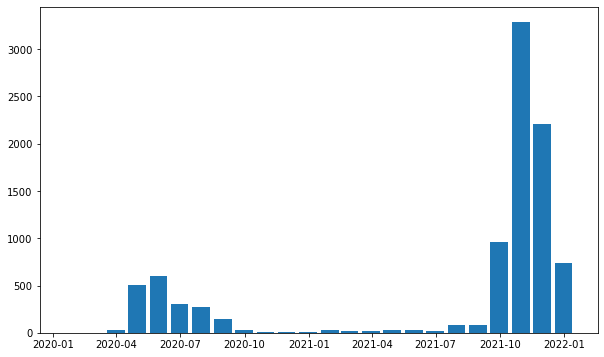

In [33]:
singapore_month = singapore.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(singapore_month['2020':].index, singapore_month.loc['2020':, "Daily_Confirmed"], width=25, align='center')

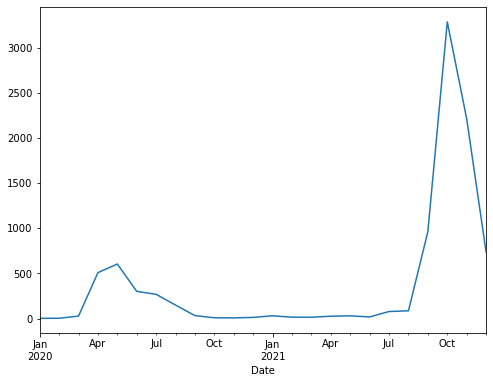

In [35]:
singapore_month["Daily_Confirmed"].plot(figsize=(8, 6))

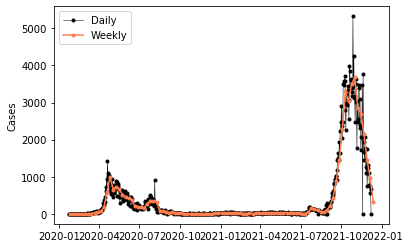

In [42]:
singapore_week = singapore.resample("W").mean()

start, end = '2020-01', '2021-12'
fig, ax = plt.subplots()
ax.plot(singapore.loc[start:end, 'Daily_Confirmed'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(singapore_week.loc[start:end, 'Daily_Confirmed'], marker='o', markersize=3.0, linestyle='-', label='Weekly', color='coral')
ax.set_ylabel("Cases")
ax.legend()

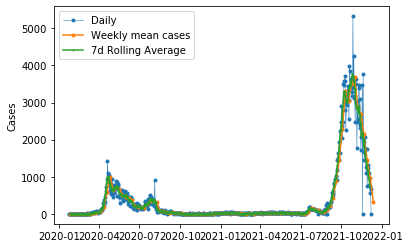

In [45]:
singapore_7d_rolling = singapore.rolling(7, center=True).mean()
start, end = '2020-01', '2021-12'
fig, ax = plt.subplots()
ax.plot(singapore.loc[start:end, 'Daily_Confirmed'], marker='.', linestyle='-', 
        linewidth=0.5, label='Daily')
ax.plot(singapore_week.loc[start:end, 'Daily_Confirmed'], marker='o', markersize=3, 
        linestyle='-', label = 'Weekly mean cases')
ax.plot(singapore_7d_rolling.loc[start:end, 'Daily_Confirmed'], marker='.', markersize = 2,linestyle='-', label='7d Rolling Average')
ax.set_ylabel('Cases')
ax.legend()